# Visualization without visualization specification file

In this example let us consider visualisation possibilities of PEtab. In particluar, let us focus on the options that do not require detailed specifications. If you want to have more control over what will be plotted, refer to this example TODO, describing usage of the visualization table.

Let's plot measurements corresponding to the one of the models from the Benchmark collection [Fujita_SciSignal2010](https://github.com/Benchmarking-Initiative/Benchmark-Models-PEtab/tree/master/Benchmark-Models/Fujita_SciSignal2010).

In [1]:
import petab
from petab.visualize import plot_data_and_simulation

folder = "example_Fujita/"
data_file_path = folder + "Fujita_measurementData.tsv"
condition_file_path = folder + "Fujita_experimentalCondition.tsv"
observables_file_path = folder + "Fujita_observables.tsv"

## Plotting PEtab problem directly
For plotting PEtab problem directly you can use `plot_petab_problem()` function.

/home/polina/Documents/Development/PEtab/petab/visualize/helper_functions.py:147: UserWarning: Default plotting: grouping by observable. If you want to specify another grouping option, please add 'datasetId' columns.
  warnings.warn('Default plotting: grouping by observable. If you want '
/home/polina/Documents/Development/PEtab/petab/visualize/helper_functions.py:158: UserWarning: DatasetIds would have been available, but other grouping was requested. Consider using datasetId.
  warnings.warn("DatasetIds would have been available, but other "


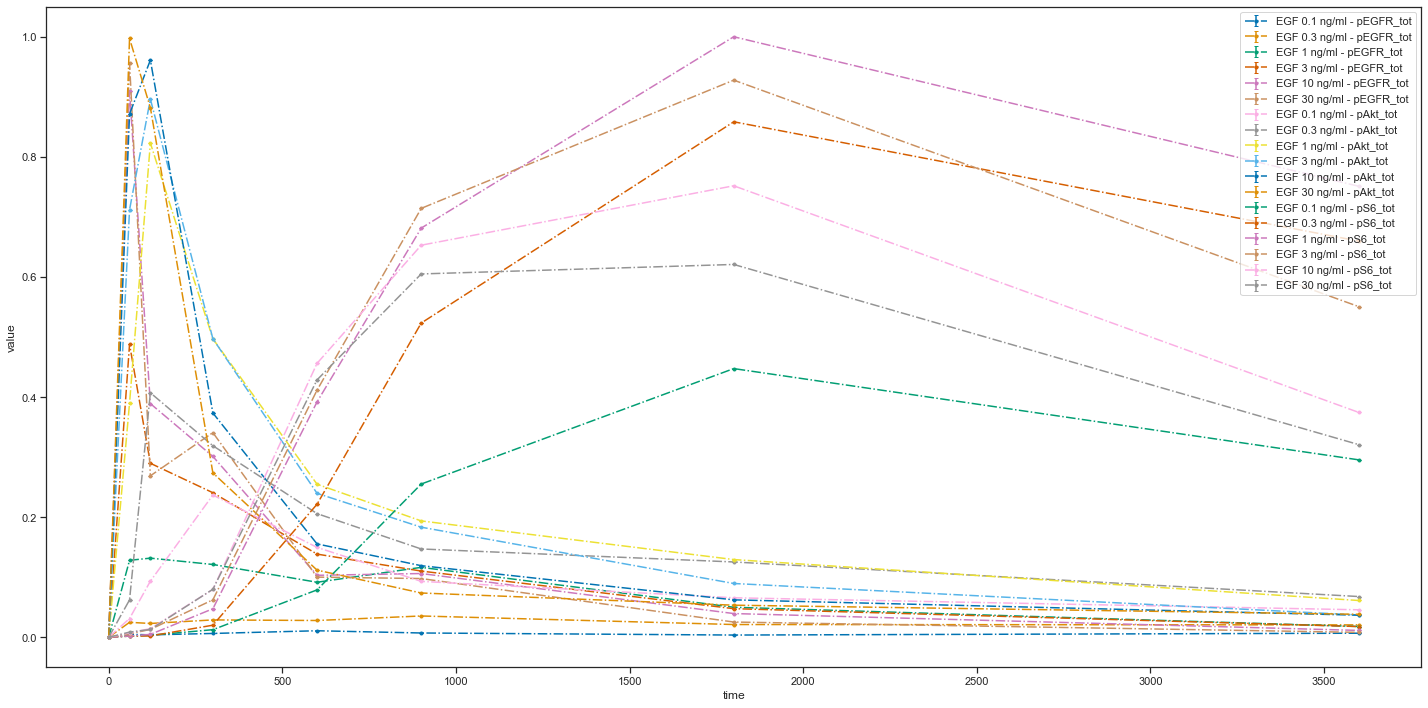

In [2]:
# load PEtab problem from files
pp = petab.Problem.from_files(measurement_file=data_file_path,
                              condition_file=condition_file_path,
                              observable_files=observables_file_path)
# Alternatively, from yaml file
# pp = petab.Problem.from_yaml(folder + "Fujita.yaml")

# plot measurements
ax = petab.visualize.plot_petab_problem(petab_problem=pp)

Note the warings above, that provide some useful hints. 

As nothing was specified regarding what should be plotted, the default were used. Namely, it was assumed that measurements are time series data, and they were grouped by observables and experimental conditions.

You might think that the resulting plot is too crowded and wish to plot measurements on different plots. It can easily be done, for example, by providing `observable_id_list`, which specifies, which observables should be plotted on a paricular plot. The value of `observable_id_list` should be a list of lists, each sublist corresponds to a separate plot.

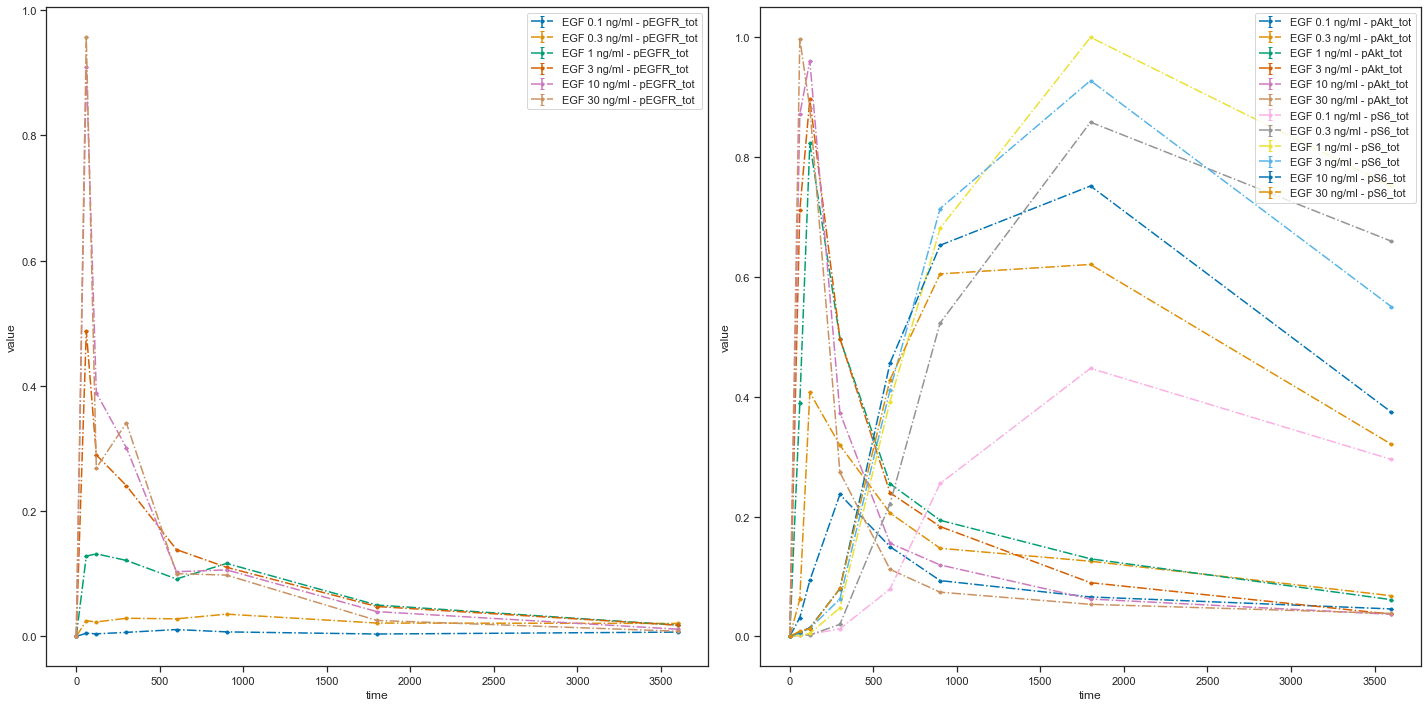

In [3]:
ax = petab.visualize.plot_petab_problem(petab_problem=pp, 
                                        observable_id_list = [['pEGFR_tot'], ['pAkt_tot', 'pS6_tot']])

# Alternatively,  numbers corresponding to the observableIds could be used. 
# The following will result in the same plot.
# ax = petab.visualize.plot_petab_problem(petab_problem=pp, 
#                                         observable_num_list = [[0], [1, 2]])

Another option is to specify which simulation conditions should be plotted.

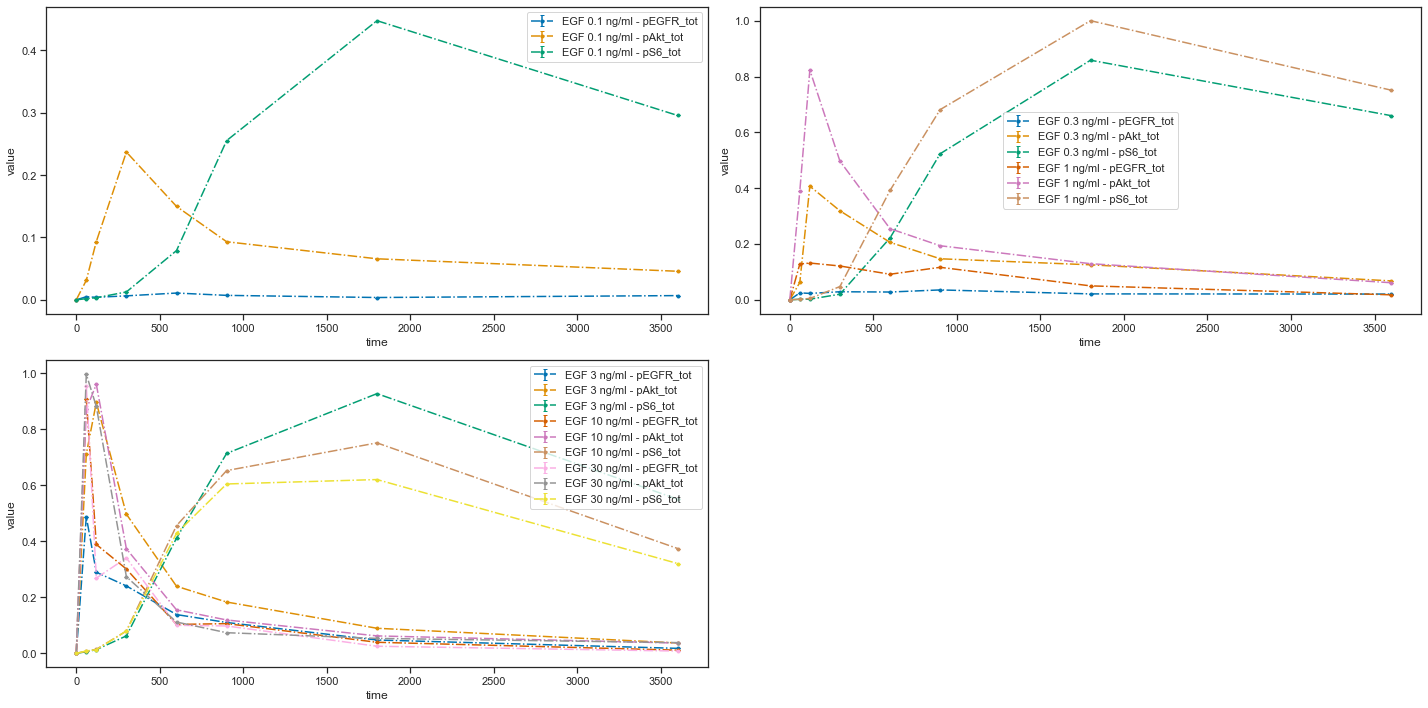

In [4]:
ax = petab.visualize.plot_petab_problem(petab_problem=pp, 
                                        sim_cond_id_list = [['model1_data1'], 
                                                            ['model1_data2', 'model1_data3'], 
                                                            ['model1_data4', 'model1_data5', 'model1_data6']])
# Similarly to the preavious case, the numbers corresponding to the simulationConditionIds can be used.
# ax = petab.visualize.plot_petab_problem(petab_problem=pp, 
#                                         sim_cond_num_list = [[0], 
#                                                             [1, 2], 
#                                                             [3, 4, 5]])

Finally, measurements can be grouped by datasetIds. 

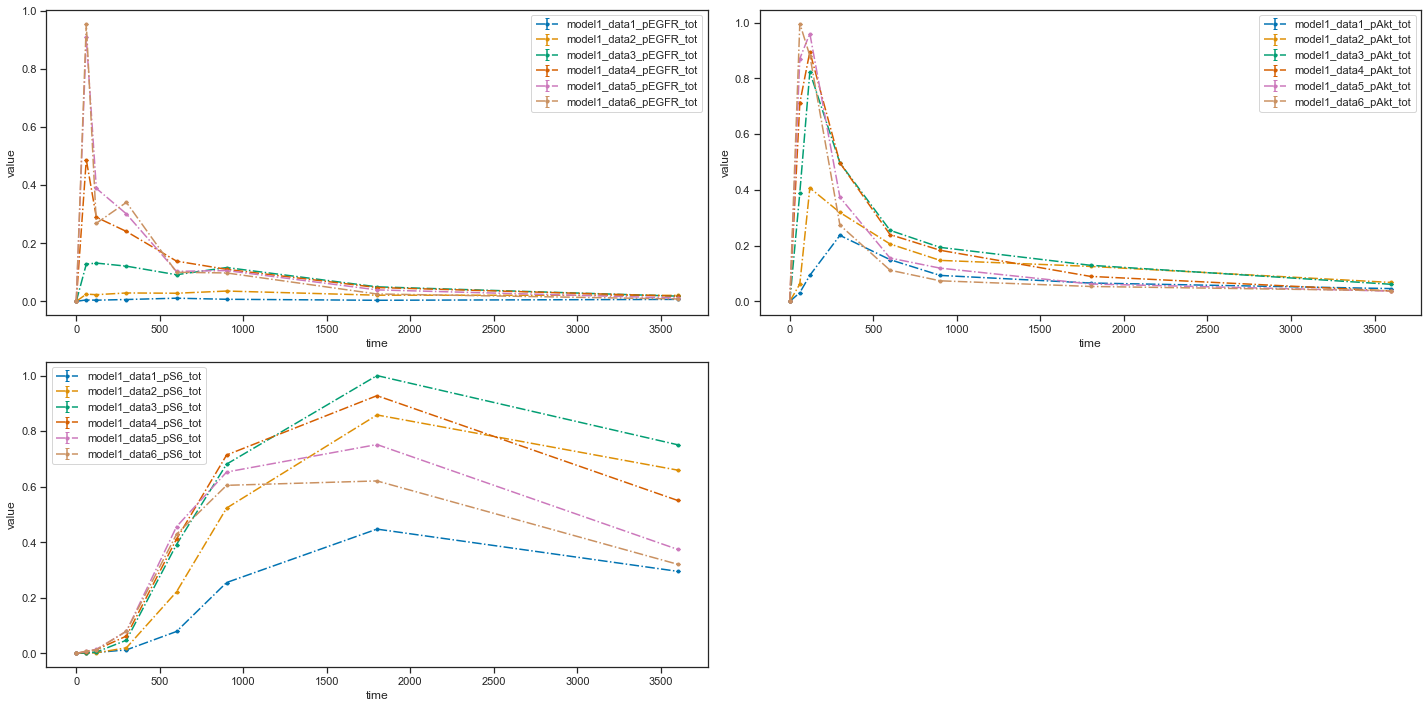

In [5]:
ax = petab.visualize.plot_petab_problem(petab_problem=pp, 
                                        dataset_id_list = [['model1_data1_pEGFR_tot', 
                                                            'model1_data2_pEGFR_tot', 
                                                            'model1_data3_pEGFR_tot',
                                                            'model1_data4_pEGFR_tot', 
                                                            'model1_data5_pEGFR_tot', 
                                                            'model1_data6_pEGFR_tot'], 
                                                           ['model1_data1_pAkt_tot', 
                                                            'model1_data2_pAkt_tot',
                                                            'model1_data3_pAkt_tot', 
                                                            'model1_data4_pAkt_tot',
                                                            'model1_data5_pAkt_tot',
                                                            'model1_data6_pAkt_tot'], 
                                                           ['model1_data1_pS6_tot',
                                                            'model1_data2_pS6_tot',
                                                            'model1_data3_pS6_tot',
                                                            'model1_data4_pS6_tot', 
                                                            'model1_data5_pS6_tot', 
                                                            'model1_data6_pS6_tot']])

To summarize, five grouping options can be used with function `plot_petab_problem()`:
 * dataset_id_list
 * sim_cond_id_lis
 * sim_cond_num_list
 * observable_id_list
 * observable_num_list

Each of them is a list of lists. Each sublist specifies a separate plot and its elements are either simulation condition IDs or observable IDs (or their corresponding number when being enumerated) or the dataset IDs.

TODO: plotted_noise
TODO: simulations

## plot_data_and_simulation